# Graph Examples - Protein Interaction dataset(minimized)

## Import cuxfilter

In [20]:
import cuxfilter
import cudf
import cugraph
import numpy as np, pandas as pd
from bokeh.palettes import Viridis10, RdBu4

ITERATIONS=500
THETA=1.0
OPTIMIZE=True

## Load required datasets

In [28]:
edges = cudf.read_csv('./data/edges.csv',)[['Source','Destination','edgeColor']]
nodes = cudf.read_csv('./data/nodes.csv',)[['x', 'y', 'SYMBOL', 'Color']]

In [30]:
nodes.head()

,x,y,SYMBOL,Color
0,-1165.280518,-10384.90137,23958,265000
1,-495.290649,-10009.99121,17754,265000
2,-754.776245,-11164.75293,25760,265000
3,-702.343262,-10496.20215,489,265000
4,-2538.711914,-10305.67676,503,265000


In [31]:
edges.head()

,Source,Destination,edgeColor
0,23958,17754,-5845277
1,25760,489,-5845277
2,503,17832,-5845277
3,18314,29849,-5845277
4,32565,37717,-5845277


## preprocess the data

In [33]:
edges.columns=["source", "destination", "color"]

G = cugraph.Graph()
G.from_cudf_edgelist(edges)

nodes_ = cugraph.layout.force_atlas2(G, max_iter=500,
                strong_gravity_mode=False,
                outbound_attraction_distribution=True,
                lin_log_mode=False,
                barnes_hut_optimize=OPTIMIZE, barnes_hut_theta=THETA, verbose=True)

In [34]:
nodes_1 = nodes_.merge(nodes, left_on='vertex', right_on='SYMBOL', suffixes=('', '_y'))[list(nodes.columns)]

In [35]:
nodes_1.head()

,x,y,SYMBOL,Color
0,-12999.151367,7437.370117,20552,265002
1,-13034.773438,8092.275391,24919,265002
2,-13389.172852,7690.877441,16817,265002
3,-13341.288086,7683.274902,31240,265002
4,-13533.685547,7538.705078,40753,265002


## Define charts

In [36]:
cux_df = cuxfilter.DataFrame.load_graph((nodes_1, edges))

In [37]:
chart0 = cuxfilter.charts.datashader.graph(edge_target='destination',edge_color_palette=['#000000'], edge_aggregate_col='color', edge_aggregate_fn='count',node_aggregate_col='Color',
                                           node_aggregate_fn='count', node_color_palette=list(Viridis10), timeout=1, node_id='SYMBOL',
                                          node_point_size=8, node_pixel_density=0.8)

chart1 = cuxfilter.charts.bar(x='Color', data_points=10)

In [39]:
d = cux_df.dashboard([chart0, chart1], layout=cuxfilter.layouts.double_feature)

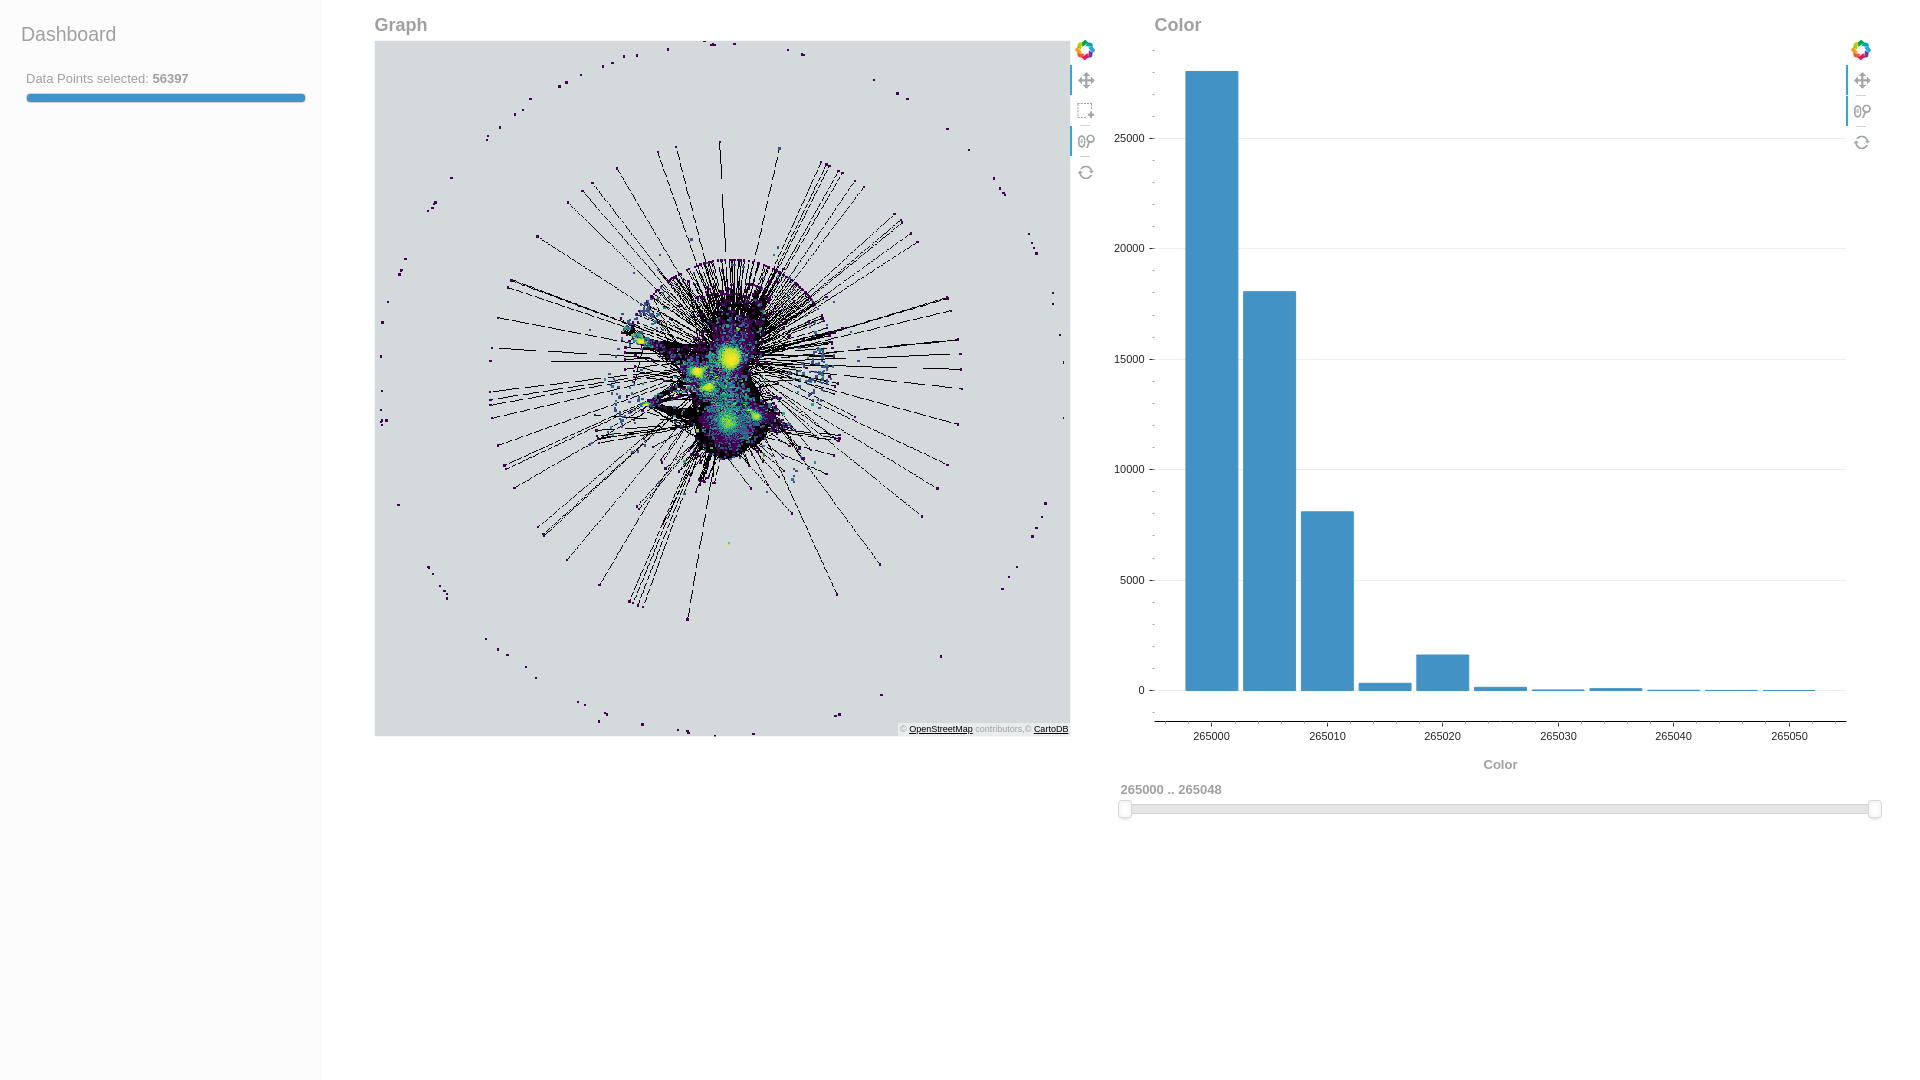

In [40]:
await d.preview()

In [13]:
d.show()

Dashboard running at port 42601


Row
    [0] Button(button_type='success', name='open cuxfilter d...)